<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/gradient-boosting/EDA/Housing_prices_kaggle_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for housing prices

In [172]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [173]:
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 80)

In [174]:
raw_df_train = pd.read_csv('https://raw.githubusercontent.com/Dimildizio/DS_course/main/gradient-boosting/data/train.csv', index_col=0)
raw_df_test = pd.read_csv('https://raw.githubusercontent.com/Dimildizio/DS_course/main/gradient-boosting/data/test.csv', index_col=0)


In [175]:
raw_df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [176]:
len(raw_df_train.columns)

80

In [177]:
raw_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [178]:
raw_df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [179]:
raw_df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [180]:
raw_df_train.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [181]:
raw_df_train.select_dtypes(include=['number']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Creating a function to convert objects and numericals into faster dtypes

In [182]:
def improve_cats(dataframe) -> pd.DataFrame:
  df = dataframe.copy()
  for col in df.columns:
    if df[col].dtype == 'int64':
      df[col] = df[col].astype('int32')
    elif df[col].dtype == 'float64':
      df[col] = df[col].astype('float32')
    elif df[col].dtype == 'object':
      df[col] = df[col].astype('category')
    else:
      print('Unknown data type')
      return
  return df

In [183]:
df = improve_cats(raw_df_train) #pd.concat([df_train_1, df_test_1])
df_test = improve_cats(raw_df_test)

In [184]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [185]:
print(f"Num of duplicates: {df.duplicated().sum()}")

Num of duplicates: 0


No duplicates

In [186]:
#check if thaose are the same rows 
#df[df['PoolQC'].notna() | (df['PoolArea']>0)]

In [187]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

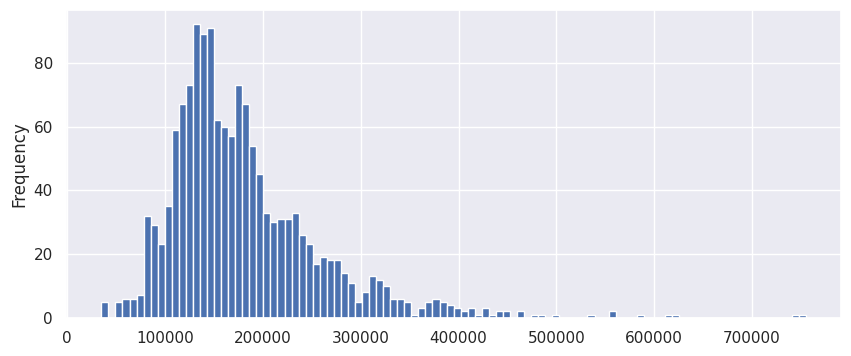

In [188]:
df['SalePrice'].plot.hist(bins=100, figsize = (10,4))

# Lets take a look at NaNs, zeros, None, Null, np.nan

In [189]:
for col in df.columns:
  print(f'{col}: {df[col].isna().sum()}')

MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 8
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
PoolArea: 

In [190]:
def plot_nas(df):
  plt.figure(figsize = (12,8))
  nulls = df.isnull().sum()
  nulls = nulls[nulls > 0]
  nulls.sort_values(inplace=True)
  nulls.plot.barh()
  plt.show()  

In [191]:
def get_nan_cols(df):
  mt = []
  for col in df.columns:
    nans = df[col].isna().sum()
    if nans > 0:
      print(f"{col}:\n{nans}/{df[col].notna().sum()} = {int(nans/1460*100)}%\n")
      mt.append(col)

In [192]:
def get_cats(df, col):
  cats = df[col].value_counts()
  print(cats)
  print('NaNs', df[col].isna().sum())

# Train dataset NaNs

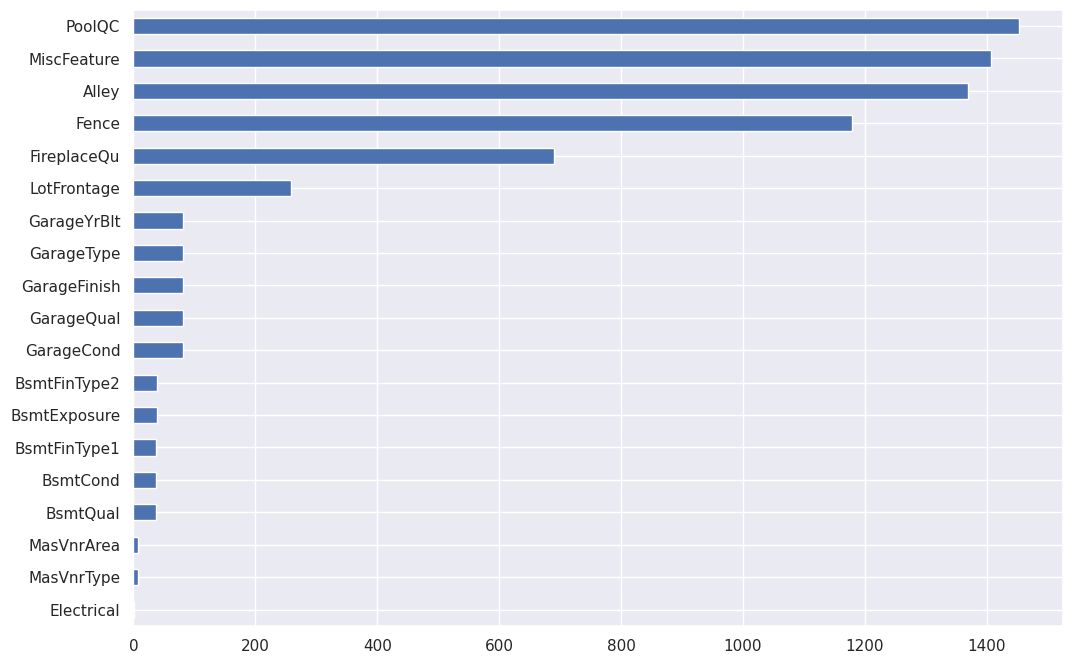

In [193]:
plot_nas(df)

In [194]:
train_nan_cols = get_nan_cols(df)

LotFrontage:
259/1201 = 17%

Alley:
1369/91 = 93%

MasVnrType:
8/1452 = 0%

MasVnrArea:
8/1452 = 0%

BsmtQual:
37/1423 = 2%

BsmtCond:
37/1423 = 2%

BsmtExposure:
38/1422 = 2%

BsmtFinType1:
37/1423 = 2%

BsmtFinType2:
38/1422 = 2%

Electrical:
1/1459 = 0%

FireplaceQu:
690/770 = 47%

GarageType:
81/1379 = 5%

GarageYrBlt:
81/1379 = 5%

GarageFinish:
81/1379 = 5%

GarageQual:
81/1379 = 5%

GarageCond:
81/1379 = 5%

PoolQC:
1453/7 = 99%

Fence:
1179/281 = 80%

MiscFeature:
1406/54 = 96%



In [195]:
df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

*Italic categories mean they are not in ***test*** dataset*

##The following cols have more NaNs than values


**Alley** - Grvl (50), Pave (41), NaN (1369) - better substitute NaNs with "**MISSING**" or **drop col**

**FireplaceQu**- Gd (380), TA (313), Fa (33), Ex (24), Po (20) Nan (690) - fill with **MISSING**

**Fence** - MnPrv (157), GdPrv (59), GdWo (54), MnWw (11), NaN (1179) - **Choose** strategy ??? 

**PoolQC** - Gd (3), Ex (2), Fa(2) NaN (1453) - **drop col** category ?

**MiscFeature** - Shed (49), Gar2 (2), Othr (2) **TenC** (1), NaN (1406) - **drop col** category ?


## The rest of the parameters

**LotFrontage** has 17% NaNs. is numeric - strategy ???

**Garage** 81 vals: GarageCond, GarageFinish, GarageYrBlt all got NaNs at the **same** **indexes**.  
Possible collinearity of notnull but need to explore more. **GarageYrBlt** is numeric. Cond and Finish - category.
**GarageQual** has **Ex** cat that is not in test dataset. possibly drop

**Same** with **Bsmt**: Cond,Exposure, Qual, FinType1, FinType2 - fill with **MISSING**. all values are of category dtype

**Same** with **MasVnrArea** & **MasVnrType** - fill values?? Area - numeric, Type - category

**Electrical** - one nan categorical value. Convert to something else?


In [196]:
df[~df['PoolQC'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


# Test dataset NaNs

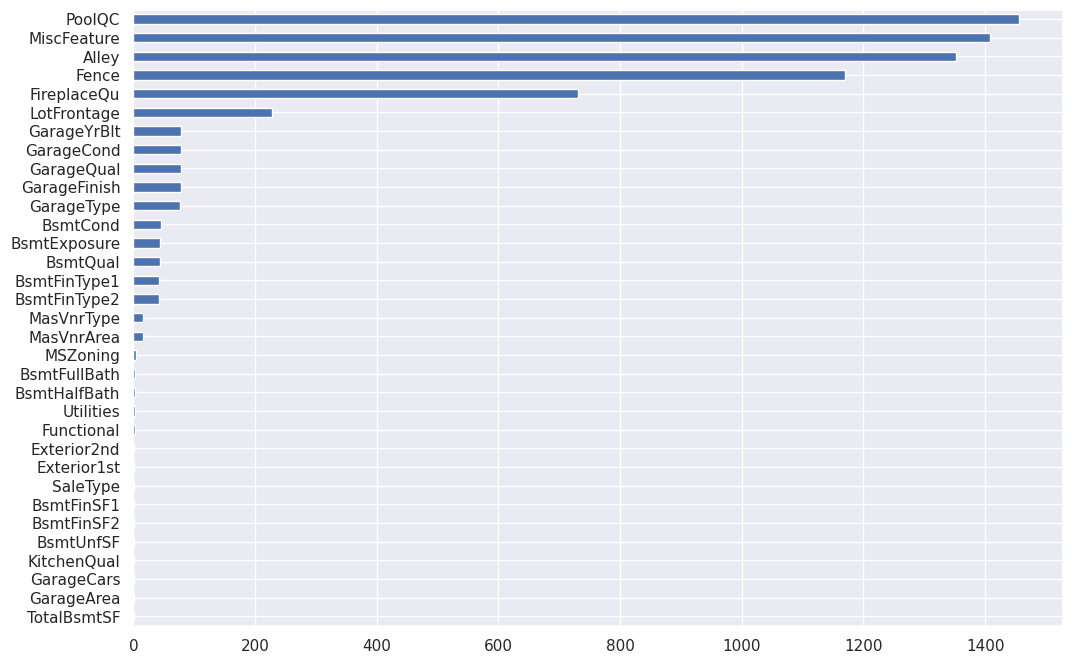

In [197]:
for x in [df_test]:
  plot_nas(x)

*Italic categories mean they are in the ***train*** dataset*

## The following categories have more than 50% NaNs

**PoolQC** - Ex (2), Gd (1), NaN - 1456 

**MiscFeature** - Shed (46), Gar2 (3), Othr (2), NaNs - 1408

**Alley** - Grvl (70), Pave (37), NaN - 1352

**Fence** - MnPrv (172), GdPrv (59), GdWo (58), MnWw (1), NaNs - 1169

**FireplaceQu** - Gd (364), TA (279), Fa (41), Po (26), Ex (19), NaNs - 730

## The rest of the parameters

**GarageType** - Attchd (853), Detchd (392), BuiltIn (98), 2 Types (17), Basment (17), Carport (6), NaNs (76) - unlike test, train dataset has no NaNs in this columns

**Garage YrBlt, Finish, Cond, Qual** - all have 78 same NaN indexes. Qual has no *Ex* value that is in train data. YrBlt is numeric.

**GarageCars** numetic (could be cat) train (0-4), test (0-5 +1NaN) **Drop NaN or median?**

**Bsmt** FinType1, FinType2, Qual, Cond, Exposure categories 

FinSF1, FinSF2, UnfSF, TotalBsmtSF, numeric (all got 1 NaN - same id2121)


**BsmtFullBath** (values from 0 to 3 + NaNs) and **BsmtHalfBath**(values from 0 to 2 + NaNs), numeric but could be categories (values from 0 to 3 + NaNs), could set NaN=3 and NaN=4.

**MSZoning** - RL(1114), RM (242), FV (74), C (all) (15), RH (10), NaN (4) - fill with **MISSING**

**LotFrontage** - numeric. 259 NaNs 110 nuniques

**Utilities** - got 2 nans, train has 1 value NoSeWa, all other (1457 and 1459) - AllPub - **Drop column**

**Exterior1st**, **Exterior2nd** - all got 1 NaN, and less uniques than in train

**MasVnrType** - categorical
**MasVnrArea** - numeric

**KitchenQual** 1 NaN cat

**Functional** 2 NaNs cat

**SaleType** 1 NaN cat



**WARNING**: there are cat values in train datasets that are absent in test and vice versa. (GarageQual "Ex" (in train) and GarageCars "5.0" (in test).

In [198]:
get_cats(df_test, 'GarageCars')

2.0    770
1.0    407
3.0    193
0.0     76
4.0     11
5.0      1
Name: GarageCars, dtype: int64
NaNs 1


In [199]:
test_nan_cols =get_nan_cols(df_test)

MSZoning:
4/1455 = 0%

LotFrontage:
227/1232 = 15%

Alley:
1352/107 = 92%

Utilities:
2/1457 = 0%

Exterior1st:
1/1458 = 0%

Exterior2nd:
1/1458 = 0%

MasVnrType:
16/1443 = 1%

MasVnrArea:
15/1444 = 1%

BsmtQual:
44/1415 = 3%

BsmtCond:
45/1414 = 3%

BsmtExposure:
44/1415 = 3%

BsmtFinType1:
42/1417 = 2%

BsmtFinSF1:
1/1458 = 0%

BsmtFinType2:
42/1417 = 2%

BsmtFinSF2:
1/1458 = 0%

BsmtUnfSF:
1/1458 = 0%

TotalBsmtSF:
1/1458 = 0%

BsmtFullBath:
2/1457 = 0%

BsmtHalfBath:
2/1457 = 0%

KitchenQual:
1/1458 = 0%

Functional:
2/1457 = 0%

FireplaceQu:
730/729 = 50%

GarageType:
76/1383 = 5%

GarageYrBlt:
78/1381 = 5%

GarageFinish:
78/1381 = 5%

GarageCars:
1/1458 = 0%

GarageArea:
1/1458 = 0%

GarageQual:
78/1381 = 5%

GarageCond:
78/1381 = 5%

PoolQC:
1456/3 = 99%

Fence:
1169/290 = 80%

MiscFeature:
1408/51 = 96%

SaleType:
1/1458 = 0%



In [200]:
#df_test_1[df_test_1['BsmtFinSF1'].isna() & df_test_1['BsmtFinSF2'].isna() & df_test_1['BsmtUnfSF'].isna() & df_test_1['TotalBsmtSF'].isna()]

Lets make a fancy table with NaNs and the percentage

In [201]:
def create_nan_df(df, name='train'):
  dfnas = df.isna().sum().sort_values(ascending=False)
  dfnas = dfnas[dfnas > 0]
  dfnas_perc = (dfnas/df.shape[0])
  new_df= pd.concat([dfnas, dfnas_perc], axis=1, keys = [name+' NaNs', name +' %'])
  return new_df

In [202]:
trainnans = create_nan_df(df)
testnans = create_nan_df(df_test,'test')
pd.concat([trainnans, testnans], axis=1).reindex(columns = ['train NaNs', 'test NaNs', 'train %', 'test %'])

,train NaNs,test NaNs,train %,test %
PoolQC,1453.0,1456.0,0.995205,0.997944
MiscFeature,1406.0,1408.0,0.963014,0.965045
Alley,1369.0,1352.0,0.937671,0.926662
Fence,1179.0,1169.0,0.807534,0.801234
FireplaceQu,690.0,730.0,0.472603,0.500343
LotFrontage,259.0,227.0,0.177397,0.155586
GarageYrBlt,81.0,78.0,0.055479,0.053461
GarageCond,81.0,78.0,0.055479,0.053461
GarageType,81.0,76.0,0.055479,0.052090
GarageFinish,81.0,78.0,0.055479,0.053461


# Drop data

Drop LowQualFinSF,PoolArea, MiscVal

Drop OpenPorch or combine with other porches

In [203]:
for col in df.columns:
  if df[col].dtype != 'category':
    print(col,'more than zero', df[df[col] > 0].shape[0])

MSSubClass more than zero 1460
LotFrontage more than zero 1201
LotArea more than zero 1460
OverallQual more than zero 1460
OverallCond more than zero 1460
YearBuilt more than zero 1460
YearRemodAdd more than zero 1460
MasVnrArea more than zero 591
BsmtFinSF1 more than zero 993
BsmtFinSF2 more than zero 167
BsmtUnfSF more than zero 1342
TotalBsmtSF more than zero 1423
1stFlrSF more than zero 1460
2ndFlrSF more than zero 631
LowQualFinSF more than zero 26
GrLivArea more than zero 1460
BsmtFullBath more than zero 604
BsmtHalfBath more than zero 82
FullBath more than zero 1451
HalfBath more than zero 547
BedroomAbvGr more than zero 1454
KitchenAbvGr more than zero 1459
TotRmsAbvGrd more than zero 1460
Fireplaces more than zero 770
GarageYrBlt more than zero 1379
GarageCars more than zero 1379
GarageArea more than zero 1379
WoodDeckSF more than zero 699
OpenPorchSF more than zero 804
EnclosedPorch more than zero 208
3SsnPorch more than zero 24
ScreenPorch more than zero 116
PoolArea more th

In [204]:
#drop rows with a small num of nulls

def drop_low_zeros(df, cols):
  new_df = df.copy()
  for col in cols:
    new_df = new_df[new_df[col] > 0]
  return new_df

**IF** we need to remove outliers here is a function

In [205]:
def remove_iqr_outliers(df, param, mult = 1.5, minimum = True):
  n = df[param].describe()
  iqr = mult * (n['75%'] - n['25%'])
  d_max = n['50%']+iqr
  df_iqr = df[df[param] <= d_max]
  if minimum:
    d_min = n['50%']-iqr
    df_iqr = df[df[param] >= d_min]
  print(df_iqr.shape)
  return df_iqr

In [206]:
def cut_iqr(df, col, mult):
  d=df[col].describe()
  val =(d['50%'] + (d['75%']-d['25%'])) * mult
  return df[df[col] <= val]

In [207]:
def check_iqr_graph(df, iqr=1.5, param='SalePrice'):
  iqr_df = remove_iqr_outliers(df, param,iqr)
  print("Skewness: %f" % iqr_df[param].skew())
  print("Kurtosis: %f" % iqr_df[param].kurt())
  sns.boxplot(y = iqr_df[param])
  plt.figure(figsize=(10, 4))
  sns.histplot(iqr_df[param])
  #displot is very fpefpl
  sns.displot(iqr_df[param])
  #sns.scatterplot(df, y = df['SalePrice'], x = df[param])
  plt.show()

## Dropping NUMERIC values

### Basement 

total basement = sum of fin1 fin2 + unfinished

In [208]:
df['TotalBsmtSF'].sum() - df['BsmtFinSF1'].sum() - df['BsmtFinSF2'].sum() - df['BsmtUnfSF'].sum()

0

In [209]:
#we should leave 0s in garageX since thats houses withour garage
#df[df['GarageCars']==0]['GarageCars'].shape
#Check if no vals < 0
for column in [col for col in df.columns if df[col].dtype not in ['category', 'object']]:
  print(column, df[df[column] < 0][column].count())

MSSubClass 0
LotFrontage 0
LotArea 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
MasVnrArea 0
BsmtFinSF1 0
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
TotRmsAbvGrd 0
Fireplaces 0
GarageYrBlt 0
GarageCars 0
GarageArea 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
MiscVal 0
MoSold 0
YrSold 0
SalePrice 0


In [252]:
df_num = df.copy()
#Create a new parameter that combines all porches
df_num['PorchSF'] = df_num['OpenPorchSF'] + df_num['EnclosedPorch'] + df_num['3SsnPorch'] + df_num['ScreenPorch']

#drop low numbers 
#cols = ['KitchenAbvGr', 'BedroomAbvGr']
#df_num = drop_low_zeros(df_num, cols)

df_num['GarageYrBlt'] = df_num['GarageYrBlt'].fillna(df_num['GarageYrBlt'].mean()) #REPLACE

#Drop numeric columns
df_num = df_num.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']) #drop porches
df_num = df_num.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])                    #drop basements
df_num = df_num.drop(columns=['GarageCars'])                                               #drop garage
df_num = df_num.drop(columns=['LowQualFinSF', 'PoolArea', 'MiscVal', 'TotRmsAbvGrd', '1stFlrSF'])      #drop misc

#wierdly it produced worse result
#for column in [col for col in df_num.columns if col.dtype not in ['category', 'object']]:
#  df_num[column] = np.log(df_num[column] + 1)

no_log = ['YearBilt']

to_log = ['LotFrontage', 'LotArea', 'GrLivArea', 'SalePrice']
for col in to_log:
  df_num[col] = np.log(df_num[col])

df_num.shape

(1460, 68)

## Cut 3 IQR

(1139, 68)

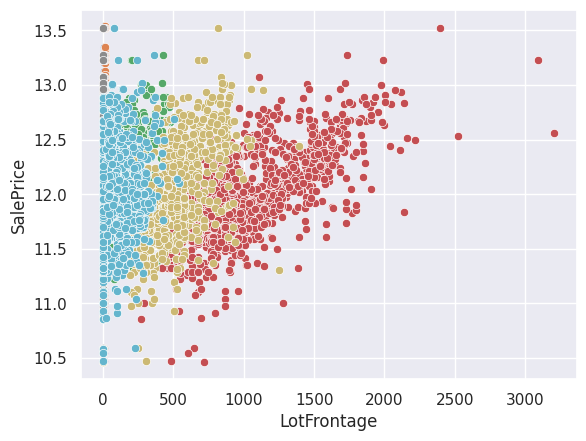

In [253]:
#Cut iqr
df_iqr = df_num.copy()
for col in ['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', \
            'TotalBsmtSF', 'GrLivArea', \
            'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'PorchSF']:

    df_iqr = cut_iqr(df_iqr, col, 3)
    if col != 'SalePrice':
      sns.scatterplot(y = df_iqr['SalePrice'], x = df_iqr[col])

df_iqr.shape

## Cut years to 1 + year - minimum_year

not sure if we need to do it at all

In [212]:
def cut_year(df, year_cols):
  for year_col in year_cols:
    m = df[year_col].min()-1
    df[year_col] = df[year_col].apply(lambda x: x-m)
    return df

#not sure if we need to cut years
#cut_year(df2, ["YearBuilt", "YearRemodAdd",  'GarageYrBlt'])

##Transform Data

In [213]:
def check_skewkur(df,param):
  sns.distplot(df[param], fit=stats.norm)
  fig = plt.figure(figsize = (4,3))
  res = stats.probplot(df[param], plot=plt)


In [214]:
#check_skewkur(df_iqr, 'SalePrice')

In [215]:
for col in df_num.columns:
  if df_num[col].dtype != 'category':
    print(col)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
TotalBsmtSF
2ndFlrSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
Fireplaces
GarageYrBlt
GarageArea
WoodDeckSF
MoSold
YrSold
SalePrice
PorchSF


Data is skewed to the right (most values are on the left) and has positive kurtosis (the peak is high)

ZEROS 0 




<ipython-input-213-18a25939d302>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[param], fit=stats.norm)


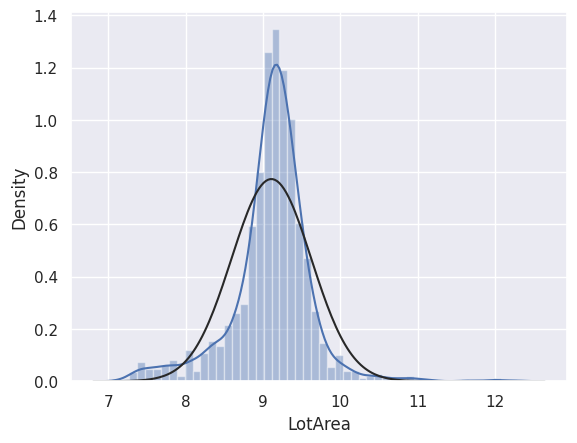

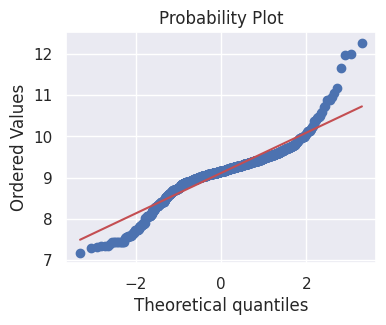

In [216]:
col = 'LotArea'
ok = ['LotFrontage', 'LotArea', '1stFlrSF','GrLivArea', 'SalePrice']
manyzeros = ['MasVnrArea','BsmtFinSF2', '2ndFlrSF', 'PorchSF']
to_cut = {'LotArea': '50000'}
def check_log(col):
  df_iqr1 = df_num.copy()
  df_iqr1[col] = np.log(df_iqr1[col])
  check_skewkur(df_iqr1, col)
print('ZEROS',(df_num[col]<1).sum(),'\n\n')
check_skewkur(df_num, col)
#check_log(col)

<Axes: ylabel='Frequency'>

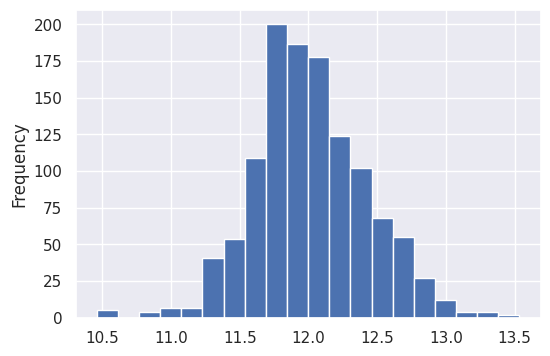

In [217]:
df_iqr['SalePrice'].plot.hist(bins=20, figsize = (6,4))

In [218]:
#Create pairplots
def plotpair(df):
  numeric_cols = df.drop(['SalePrice'],axis=1).select_dtypes(include='number').columns
  colsets = [numeric_cols[i:i+5] for i in range(0, len(numeric_cols), 5)]
  for colset in colsets:
    grid = sns.PairGrid(df, y_vars=['SalePrice'], x_vars=colset, height=3, aspect=1.5)
    grid.map(sns.scatterplot)

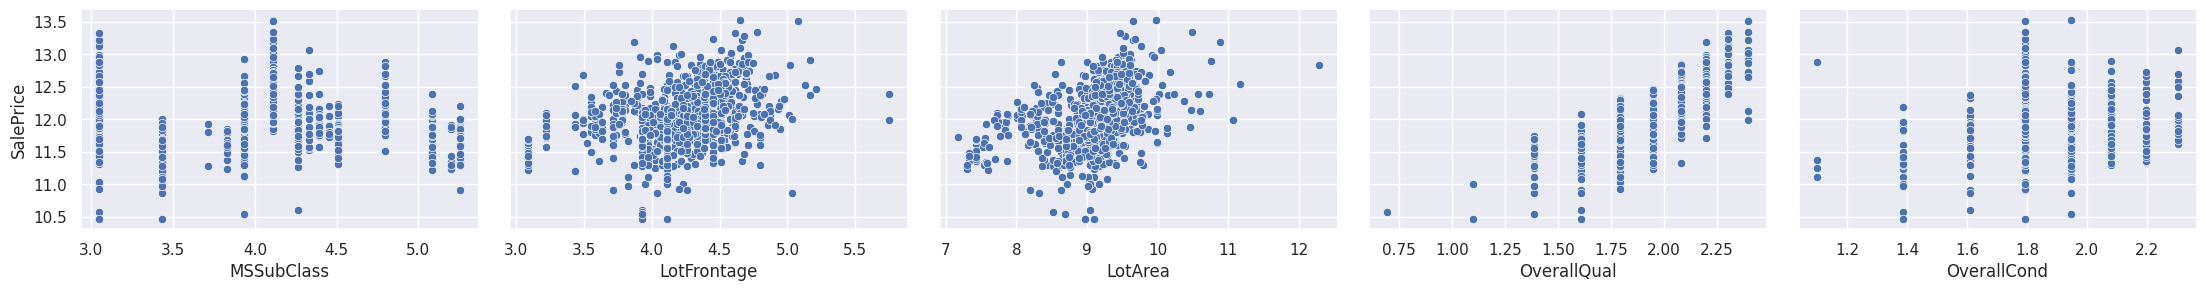

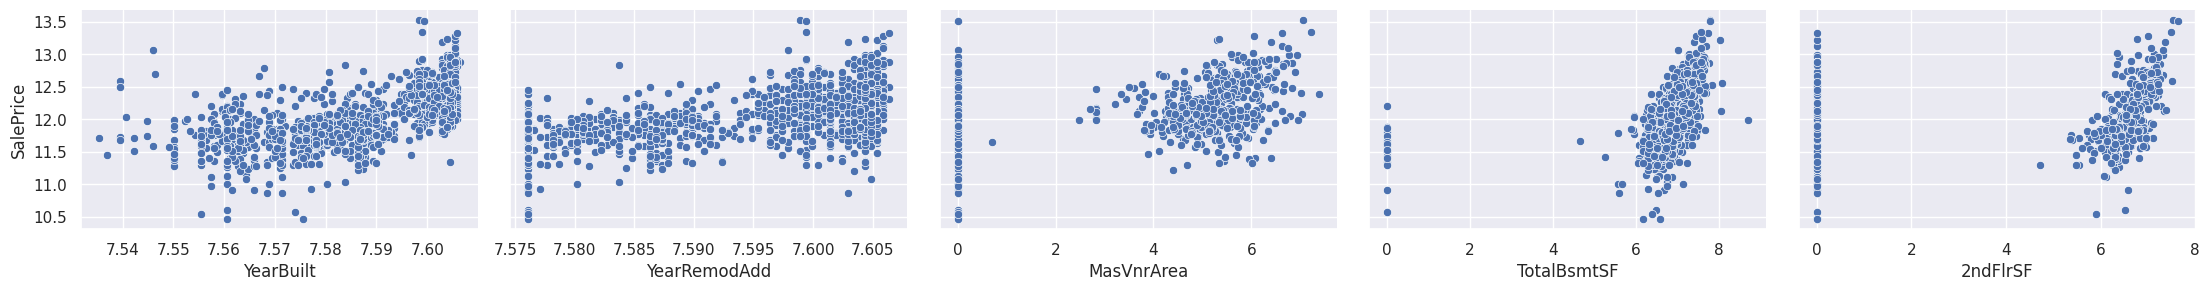

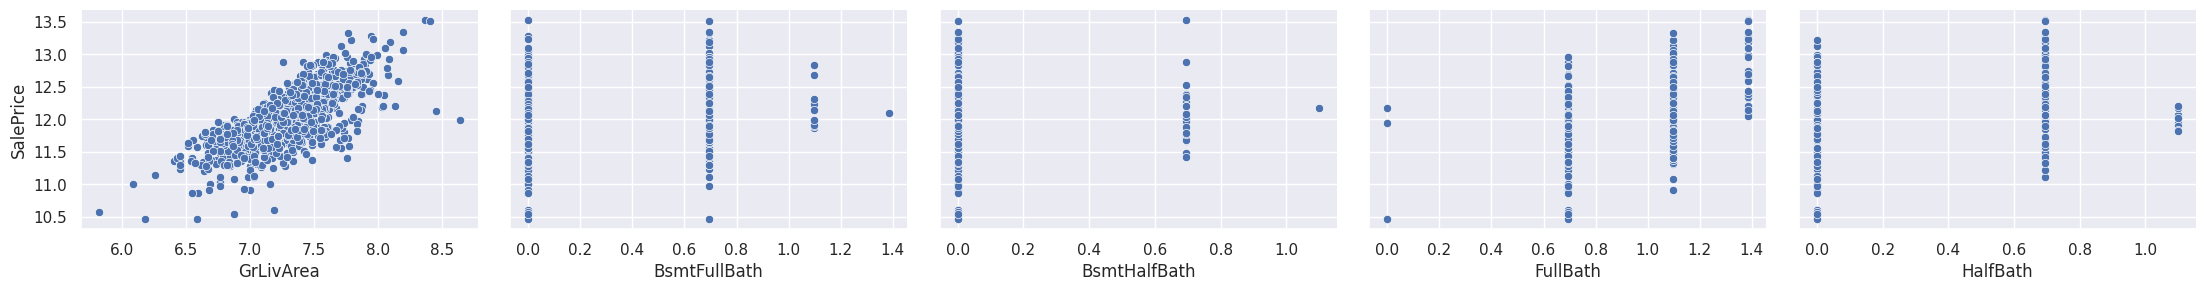

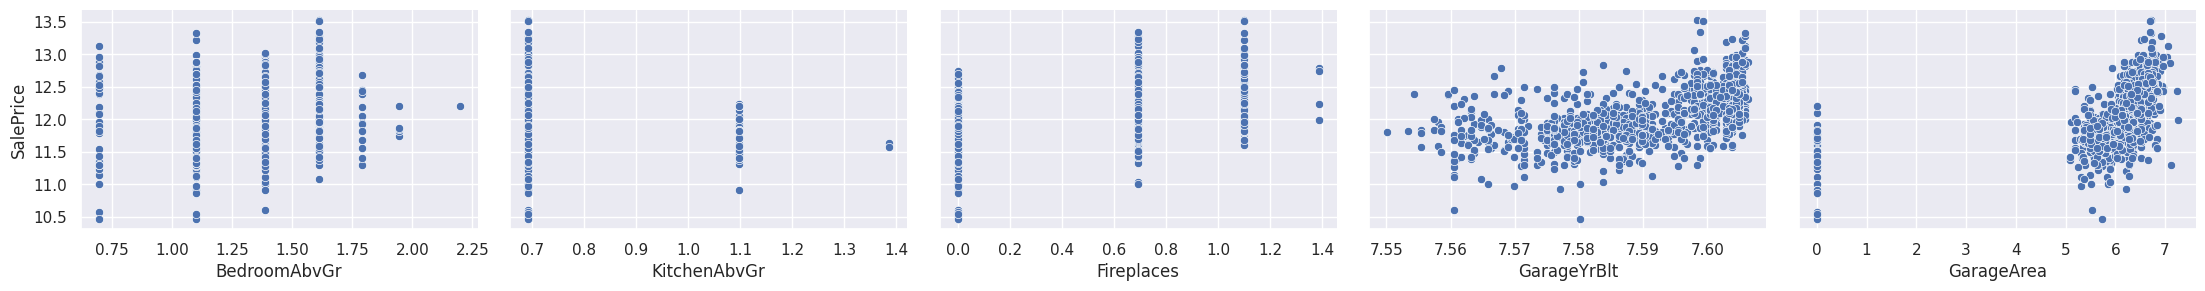

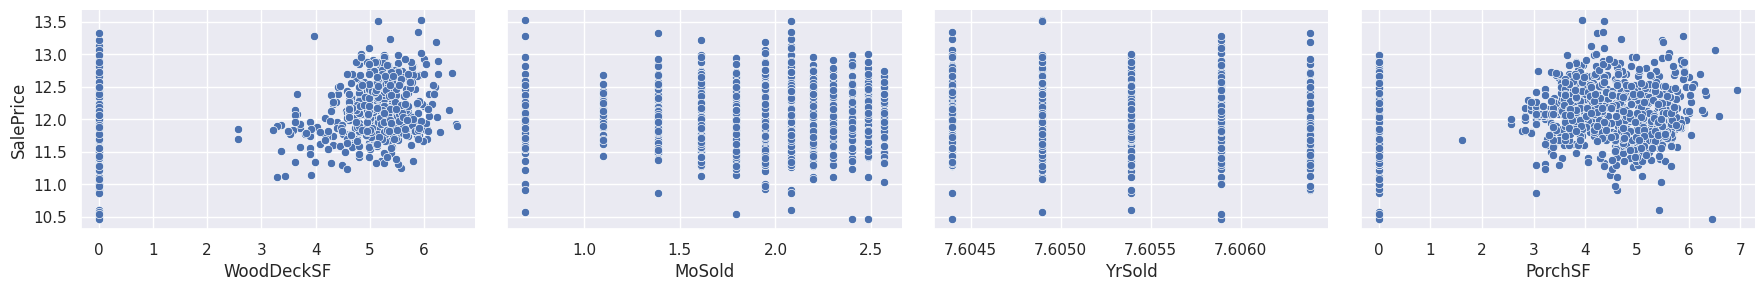

In [219]:
plotpair(df_iqr)

## Dropping CATEGORIAL values and filling

In [220]:
def print_cat_counts(df):
  for column_name in df.columns:
    if df[column_name].dtype == 'category':
      print(df[column_name].value_counts() / len(df))
      print()

In [221]:
#we need to remove empty values in categories if there are ones 
def cut_cats(df):
  for catcol in df.columns:
    if df[catcol].dtype == 'category':
      df[catcol].cat.remove_unused_categories() 
  return df

In [222]:
def create_mt_catcol(df_new):
  df = df_new.copy()
  for col in df.columns:
      if df[col].dtype == 'category':
        if df[col].isna().any():
          df[col] = df[col].cat.add_categories(['MISSING'])
          df[col] = df[col].fillna('MISSING')
  cut_cats(df)
  return df

In [223]:
def many_boxplots(df):
  for col in df.columns:
    if col != 'SalePrice' and df[col].dtype == 'category':
      data = pd.concat([df['SalePrice'], df[col]], axis=1)
      f, ax = plt.subplots(figsize=(4, 2))
      ax.tick_params(axis='x', labelrotation=90)
      fig = sns.boxplot(x=col, y="SalePrice", data=data)


In [224]:
print_cat_counts(df_iqr)

RL         0.768067
RM         0.167227
FV         0.045378
RH         0.010924
C (all)    0.008403
Name: MSZoning, dtype: float64

Pave    0.995798
Grvl    0.004202
Name: Street, dtype: float64

Grvl    0.039496
Pave    0.031933
Name: Alley, dtype: float64

Reg    0.708403
IR1    0.263866
IR2    0.021849
IR3    0.005882
Name: LotShape, dtype: float64

Lvl    0.900840
Bnk    0.047059
HLS    0.038655
Low    0.013445
Name: LandContour, dtype: float64

AllPub    1.0
NoSeWa    0.0
Name: Utilities, dtype: float64

Inside     0.763866
Corner     0.168067
CulDSac    0.036975
FR2        0.027731
FR3        0.003361
Name: LotConfig, dtype: float64

Gtl    0.955462
Mod    0.040336
Sev    0.004202
Name: LandSlope, dtype: float64

NAmes      0.156303
CollgCr    0.105042
OldTown    0.090756
Edwards    0.076471
NridgHt    0.063025
Somerst    0.063025
BrkSide    0.042857
SawyerW    0.041176
Gilbert    0.041176
Sawyer     0.039496
NWAmes     0.037815
Crawfor    0.034454
Mitchel    0.030252
IDOTRR     

We will drop everyting that has more than 85% of data in one column
Drop Utilities, Condition1, Condition2, Street, LandContour, LandSlope, RoofMatl, ExterCond, BsmtCond, BsmtFinType2, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, PavedDrive, SaleType, 

In [225]:
df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [226]:
df_iqr.shape

(1190, 68)

In [227]:
df_cats = df_iqr.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'Utilities', 'Condition1', \
                       'Condition2', 'Street', 'LandContour', 'LandSlope', \
                'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', \
                'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType'], axis = 1)
df_cats = create_mt_catcol(df_cats)
df_cats.shape

(1190, 46)

<ipython-input-223-e8d0d078bbac>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, ax = plt.subplots(figsize=(4, 2))


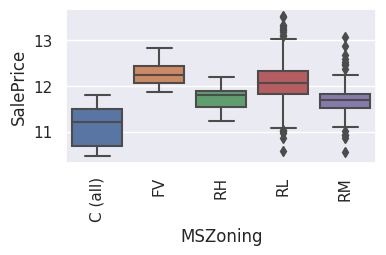

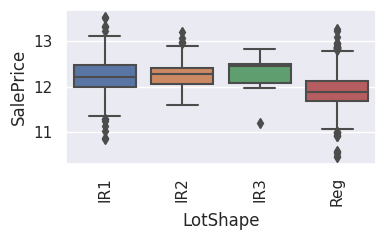

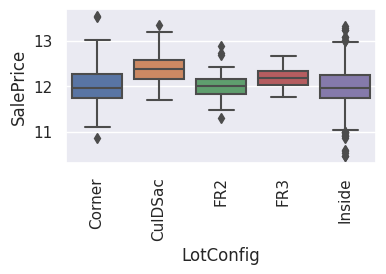

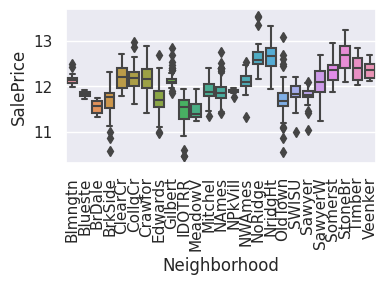

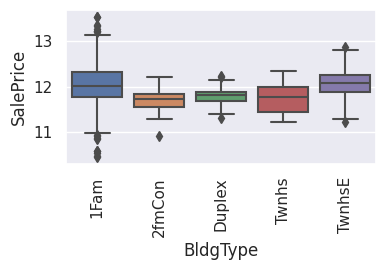

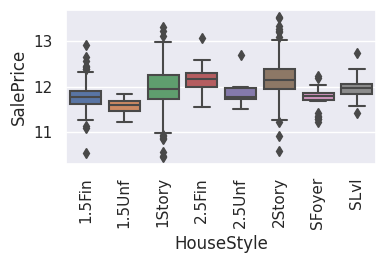

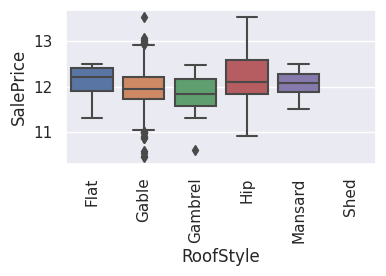

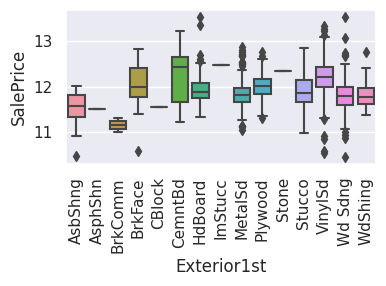

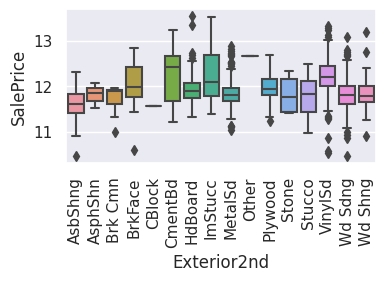

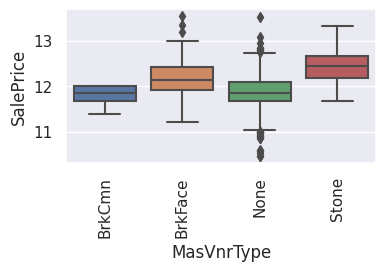

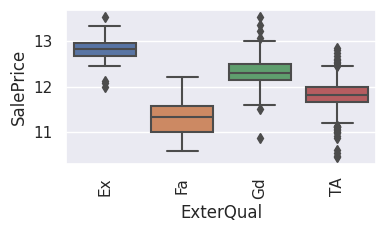

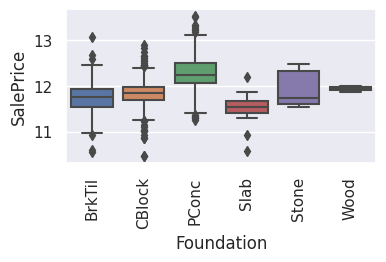

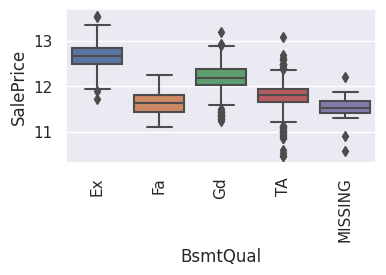

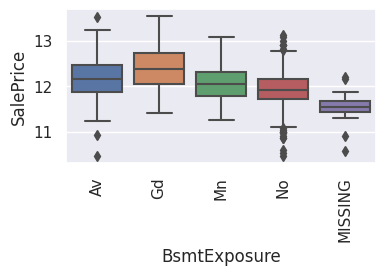

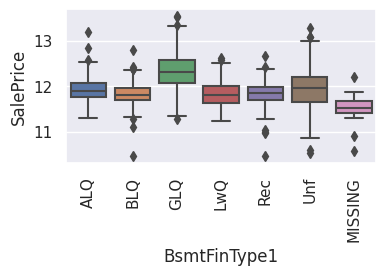

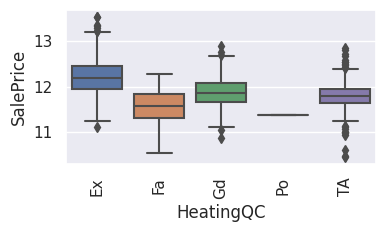

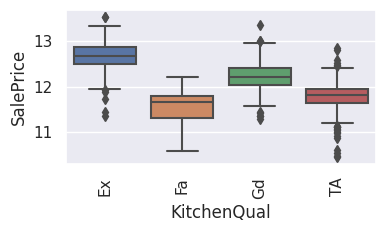

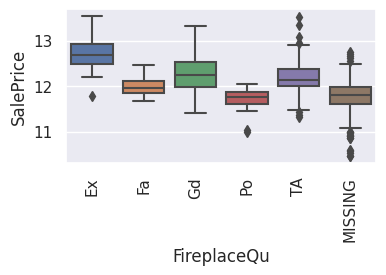

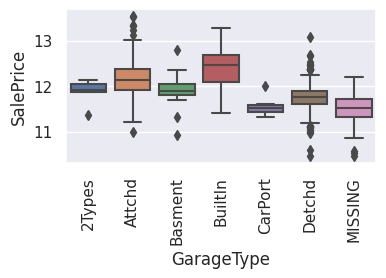

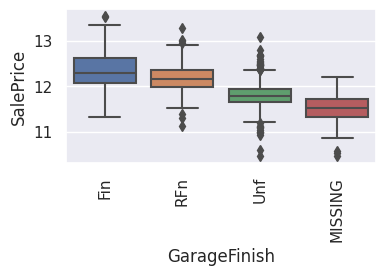

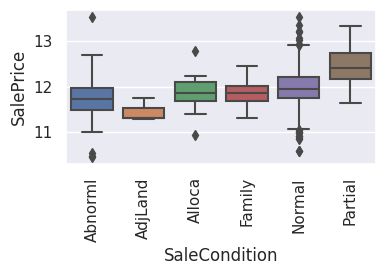

In [228]:
many_boxplots(df_cats)

## WARNING: Some columns now have None and Missing 

## Lets check the correlation matrix

In [229]:
df_corr = df_cats.copy()

In [230]:
def corellall(df):
  corrmatrix = df.corr()
  f, ax = plt.subplots(figsize=(10, 8))
  sns.heatmap(corrmatrix, square=True, linewidth = 0.8, cmap = 'YlGnBu',xticklabels=True, yticklabels=True)
  return corrmatrix

In [231]:
def topcorr(df, param, positive = True, mostcorrelated_num = 12):
  if positive:
    cols = corellall(df).nlargest(mostcorrelated_num, param)[param].index
  else: 
    cols = corellall(df).nsmallest(mostcorrelated_num-1, param)[param].index
    cols = cols.insert(0, param)
  cm = np.corrcoef(df[cols].values.T)
  sns.set(font_scale=1)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
  plt.show()
  
  

## Numeric data

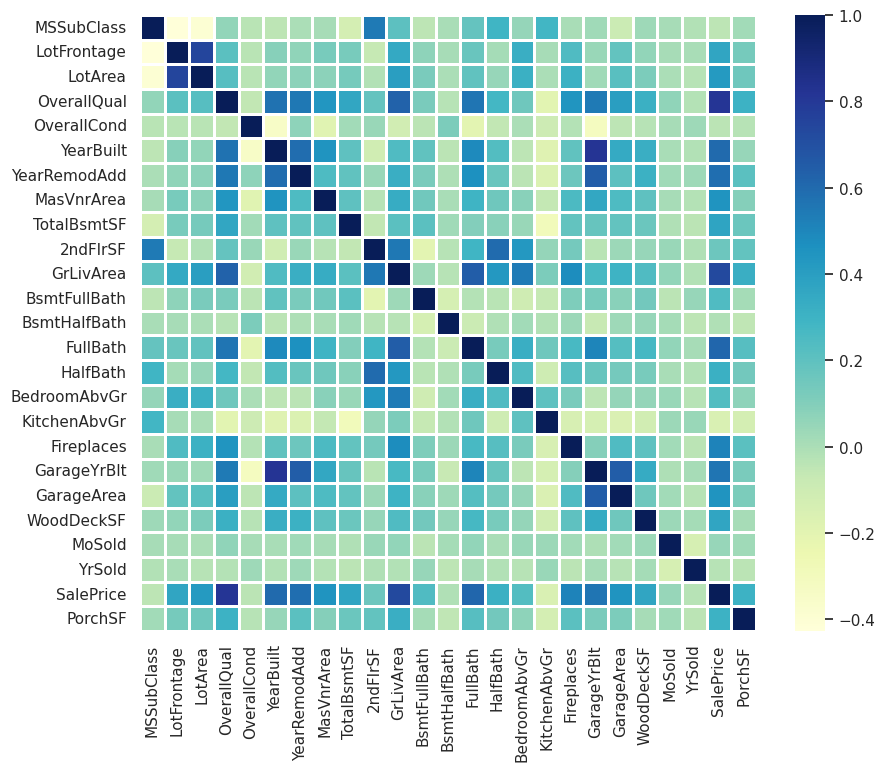

In [232]:
corrmatrix = corellall(df_corr)

Oh we see that some categories are definitelly correlated (white and orange)

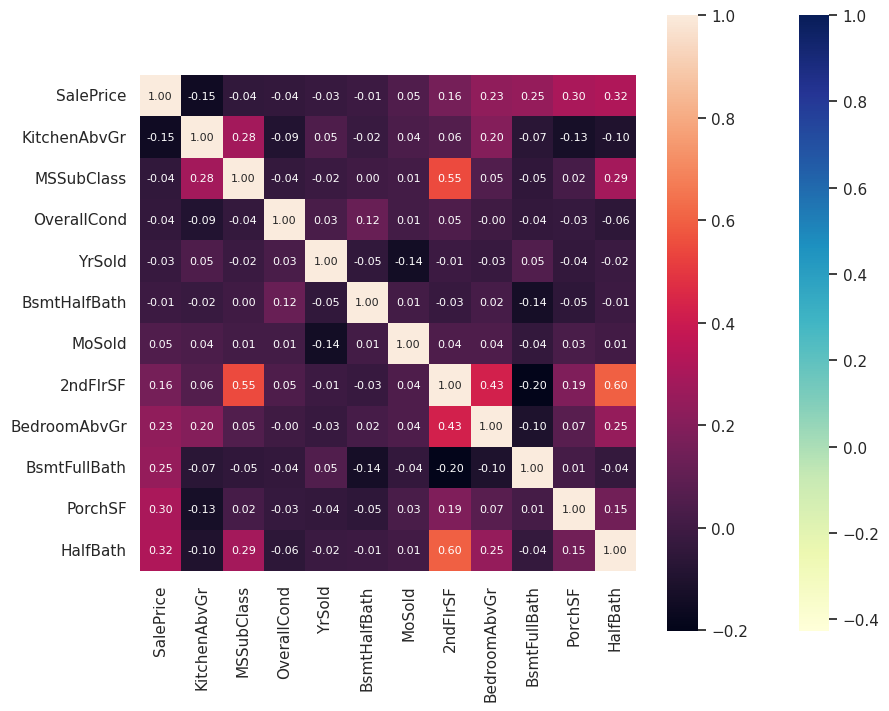

In [233]:
topcorr(df_corr, 'SalePrice', False)

Price is correlated with overal quality, GrLivArea, Garage size for cars, Year built and remodified

Garage area is correlated with Garage car size - DROP last one

TotalBsmtSF too correlated with 1stFlrSF 80% - Do not drop. Basement+1st floor+2nd floor

GrLivArea with TotRmsAbvGrd - drop TotRmsAbvGrd
Year bult is negativelly correlated with Overal condition

## Categorial data

In [234]:
def non_num_corr(df, cat = 'category'):
  facols = df.select_dtypes(include=[cat]).apply(lambda x: x.factorize()[0])
  for col in facols.columns:
    facols[col].fillna('MISSING')
  facols['SalePrice'] = df['SalePrice']
  corellall(facols)
  return facols

Text(0.5, 1.0, 'Parameters corr after EDA')

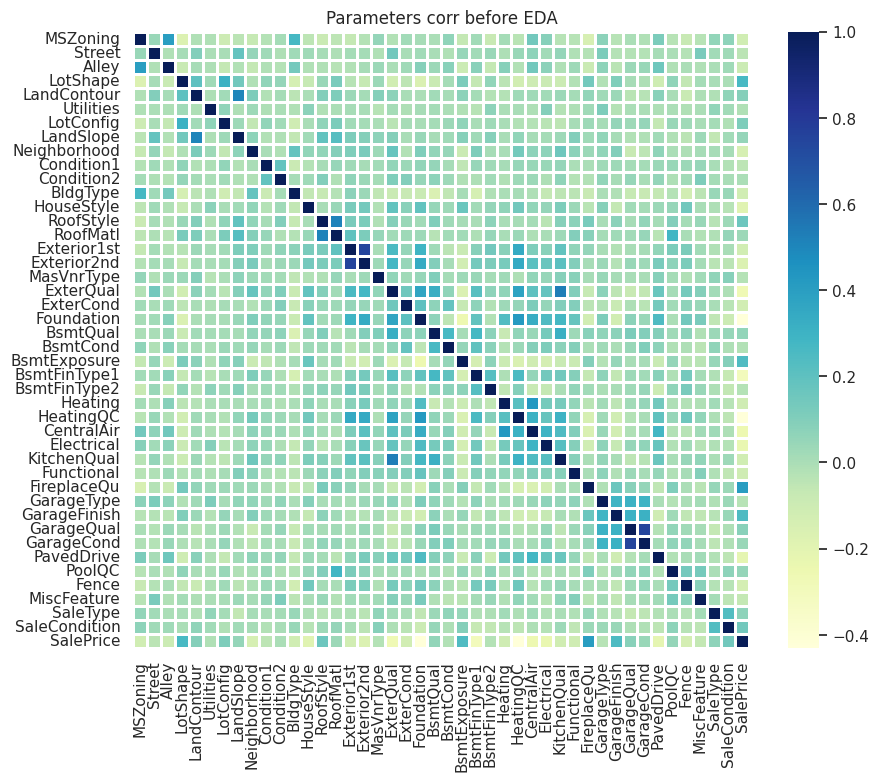

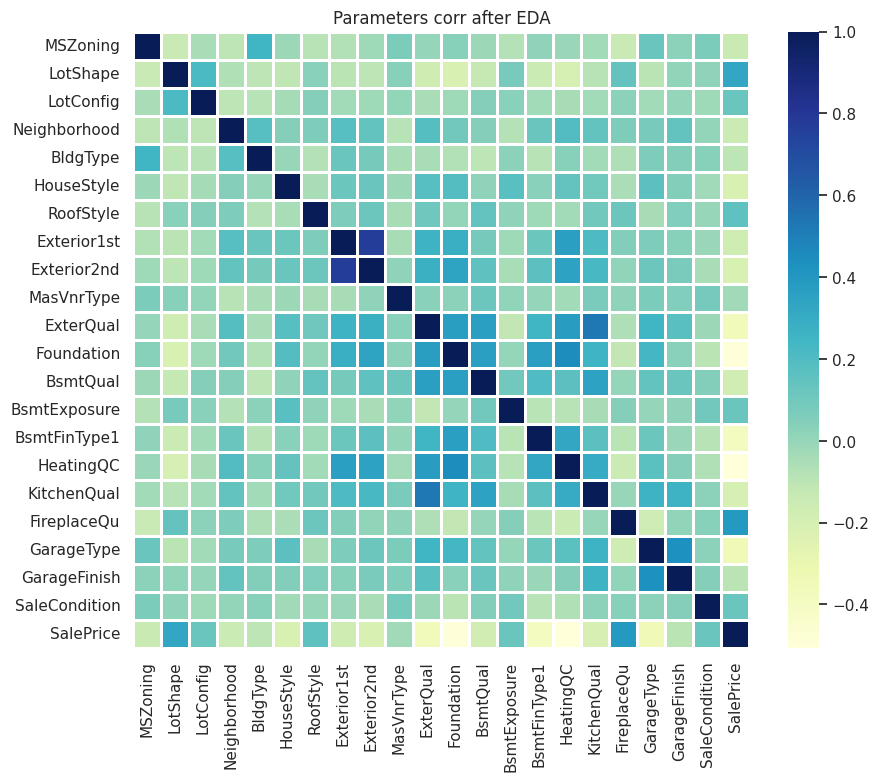

In [235]:
noeda = non_num_corr(raw_df_train, 'object')
plt.title('Parameters corr before EDA')
yeseda = non_num_corr(df_corr)
plt.title('Parameters corr after EDA')

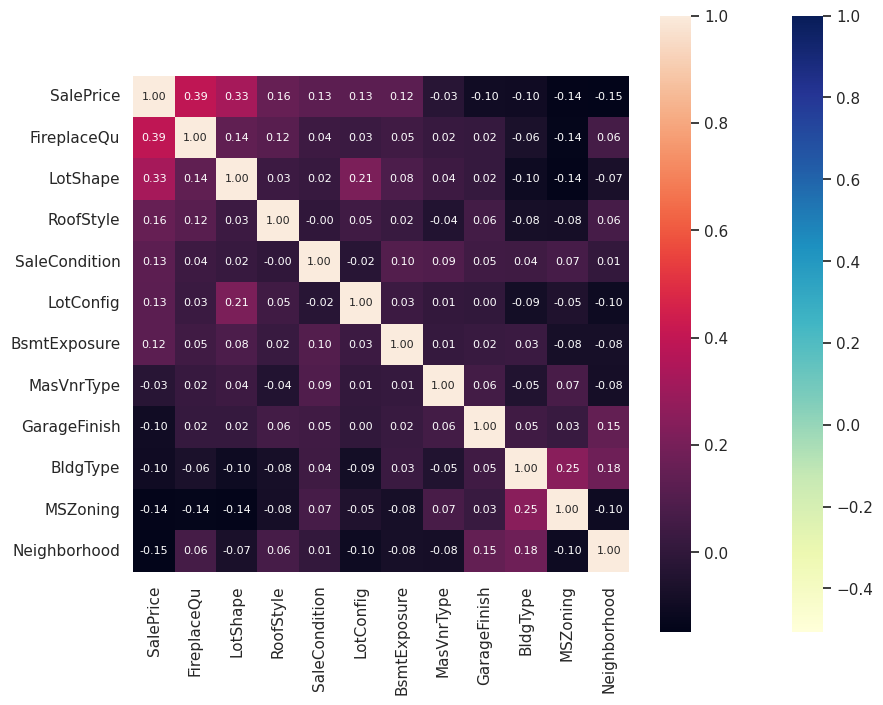

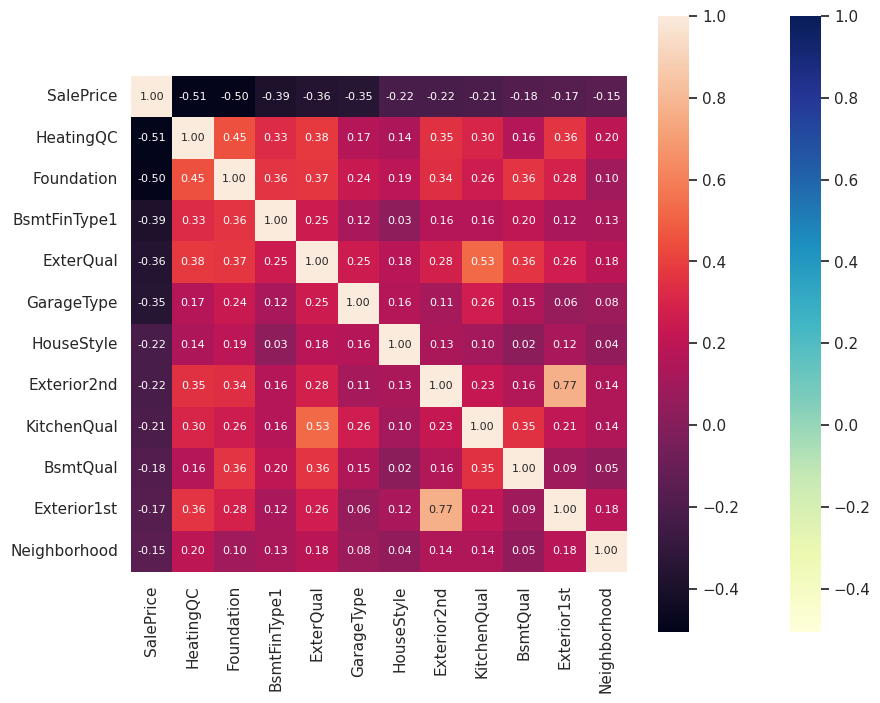

In [236]:
topcorr(yeseda, 'SalePrice')
topcorr(yeseda, 'SalePrice', positive = False)

In [237]:
df_corr.shape

(1190, 46)

In [238]:
s=df['FireplaceQu']

In [239]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder,\
Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LassoLarsCV, LinearRegression
import itertools
from random import shuffle

In [240]:
def fill_missing_cat(df):
  new_df = pd.DataFrame
  for col in df.columns:
    if df[col].dtype in ['object','category']:
      if df[col].isna().any():
        new_df[col] = df[col].cat.add_categories(['MISSING'])
        new_df[col] = df[col].fillna('MISSING')
      

  df = df.apply(lambda x: x.factorize()[0])
  return df

In [241]:
#Refactor after YFrite writes code for filling nans
def fill_numeric_nan(df_col):
  return df_col
  #return df_col.fillna(df_col.mean())

In [242]:
#Change after we get encoding
def get_valid_cols(df, ok_cols, to_drop=[]):
  return [x for x in df.columns if df[x].dtype not in ['category', 'object'] and x not in ok_cols+to_drop]

In [243]:
def split_data(df, target):
  X = df.drop(target, axis=1)
  y = df[target]
  return train_test_split(X, y, test_size=0.2, random_state=42)
  

In [244]:
#Could run separate times for y_pred_train, y_pred_test but training two could take longer 
def run_model(X_train, y_train, X_test, model = LinearRegression):
  pipe = make_pipeline(StandardScaler(), model())
  pipe.fit(X_train, y_train)

  y_pred_train = pipe.predict(X_train)
  y_pred_test = pipe.predict(X_test)
  return y_pred_train, y_pred_test

In [245]:
def print_scores(y_train, y_test, y_pred_train, y_pred_test, print_train=False):
    print('Column: ', col)
    if print_train:
      print('train: r2', r2_score(y_train, y_pred_train))
      print("train: root mean squared error:", np.sqrt(mean_squared_error(y_pred_train, y_train)))
      print('Test:')
    print('test: r2', r2_score(y_test, y_pred_test))
    print("test: root mean squared error:", np.sqrt(mean_squared_error(y_pred_test, y_test)))
    print()

In [246]:
def find_best_param(dataset: pd.DataFrame, valid_cols: list, ok_cols: list, to_drop = [], r2_threshold = 0.67, target = "SalePrice"):
  dataset = dataset.copy()
  best_col = ['', r2_threshold]
  
  
  #new_cols = [x for x in dataset.columns if (x not in ok_cols+to_drop and dataset[x].dtype not in ['category', 'object'])] #delete last part after encoding

  for col in valid_cols:
    #old good col + a test col
    test_cols = ok_cols + [col]
    df = dataset[test_cols]
    #FILL NAN CATS and FILL NAN NUMERICS
    #df[col] = fill_numeric_nan(df[col])
    try:
      X_train, X_test, y_train, y_test = split_data(df, target)
      y_pred_train, y_pred_test = run_model(X_train, y_train, X_test)

      r2 = r2_score(y_test, y_pred_test) #compare_scores(y_train, y_test, y_pred_train, y_pred_test, r2_threshold)
      if r2 > r2_threshold:
        r2_threshold = r2
        best_col = [col, r2]
        #print_scores(y_train, y_test, y_pred_train, y_pred_test)
    except ValueError:
      continue
      #print(col, 'has NaN')
  result = ok_cols + [best_col[0]]
  #print('Best result:', result, best_col[1])
  return best_col


In [247]:
valids = get_valid_cols(df_cats, ['SalePrice', 'OverallQual'])
find_best_param(df_cats, valids, ['SalePrice','OverallQual'])

['GrLivArea', 0.7275196816179088]

In [248]:
def get_best_cols(df, ok_cols: list, to_drop =[],  r2_threshold=0.67):
  valid_cols = get_valid_cols(df_cats, ok_cols)#
  valid_nodups = valid_cols.copy()
  shuffle(valid_cols)
  #best_result = r2_threshold
  for col in valid_cols:
    #print(new_valid)
    best_col, r2 = find_best_param(df_cats, valid_nodups, ok_cols, r2_threshold)
    if r2 - r2_threshold > 0.001:
      r2_threshold = r2
      ok_cols.append(best_col)
      valid_nodups.remove(col)
  return ok_cols, r2_threshold


In [250]:
get_best_cols(df_cats, ['SalePrice', 'OverallQual'])

(['SalePrice',
  'OverallQual',
  'GrLivArea',
  'YearBuilt',
  'LotArea',
  'TotalBsmtSF',
  '2ndFlrSF',
  'GarageArea',
  'YearRemodAdd',
  'BsmtFullBath',
  'Fireplaces',
  'MSSubClass'],
 0.8483064209599387)

In [158]:
def many_shuffles(num=10):
  bestestbest = [['SalePrice', 'OverallQual'], 0.67]
  for x in range(10):
    print('shuffle:', x+1)
    result = get_best_cols(df_cats, ['SalePrice', 'OverallQual'])
    if result[1] > bestestbest[1]:
      bestestbest = result
      print(bestestbest)
  print('\n\nThe result is:')
  print(bestestbest)
many_shuffles(2)

shuffle: 1
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'LotFrontage', 'YearBuilt', 'HalfBath', 'BsmtHalfBath', 'BedroomAbvGr'], 0.8787481315330891)
shuffle: 2
shuffle: 3
shuffle: 4
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'OverallCond', 'YearBuilt', 'MSSubClass', 'BedroomAbvGr', '2ndFlrSF'], 0.8912997212217404)
shuffle: 5
shuffle: 6
shuffle: 7
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'OverallCond', 'YearBuilt', 'LotFrontage', 'YrSold', 'HalfBath'], 0.8954603588176043)
shuffle: 8
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'OverallCond', 'YearBuilt', 'LotFrontage', 'PorchSF'], 0.8957042334196645)
shuffle: 9
shuffle: 10


The result is:
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'Overal


The result is:
(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea', 'BsmtFullBath', 'OverallCond', 'YearBuilt', 'LotFrontage', 'PorchSF'], 0.8957042334196645)

In [98]:
ok_cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'YearRemodAdd', 'GarageArea']
shuffle(ok_cols)
n = 0.35
cur_col = ''
d = {}

dataset = df_cats.drop(['GarageYrBlt', 'OverallQual'], axis=1).copy() # Почему гаражйрблт?год постройки гаража? - Там пустые нумерик значения. не придумали чем заполнять.
new_cols = [x for x in dataset.columns if x not in ok_cols]


for col in new_cols:
  testcol = ok_cols+[col]
  df_bs = dataset[testcol] #pd.concat([dataset[['SalePrice', 'OverallQual']], s['HasPorch']], axis=1).copy()
  #df_bs['PowerQual'] = df_bs['OverallQual']**2
  target = "SalePrice"
  for col in df_bs.columns:
    if df_bs[col].dtype in ['object','category']:
      if df_bs[col].isna().any():
        df_bs[col] = df_bs[col].cat.add_categories(['MISSING'])
        df_bs[col] = df_bs[col].fillna('MISSING')
    #else:
      #if df_bs[col].isna().any():
      #  df_bs[col] = df_bs[col].fillna(df_bs[col].mean())
      df_bs = df_bs.apply(lambda x: x.factorize()[0])
  #df_bs = pd.get_dummies(data=df_bs, columns=[x for x in df_bs.columns if df_bs[x].dtype =='category'])
  for col in df_bs.columns:
    if df_bs[col].isna().any():
      print(col)
      print(df_bs[col])
  X = df_bs.drop(target, axis=1)
  y = df_bs[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  model = LinearRegression()#LassoLarsCV(max_iter=10000)#max_iter=10000)#

  pipe = make_pipeline(StandardScaler(), model)
  pipe.fit(X_train, y_train)

  y_pred_train = pipe.predict(X_train)
  y_pred_test = pipe.predict(X_test)


  if r2_score(y_test, y_pred_test) > n:
    n = r2_score(y_test, y_pred_test)
    cur_col = col
    
    #print('train: r2', r2_score(y_train, y_pred_train))
    print("train: root mean squared error:", np.sqrt(mean_squared_error(y_pred_train, y_train)))
    
    print('test: r2', r2_score(y_test, y_pred_test))
    print("test: root mean squared error:", np.sqrt(mean_squared_error(y_pred_test, y_test)))
    print()

    '''print(col)
    ok_cols.append(col)
    print(ok_cols)
    d[col] = r2_score(y_test, y_pred_test)-n
    n = r2_score(y_test, y_pred_test)
    print(df_bs.shape)

print('\n\n')'''
cur_col  
#d

train: root mean squared error: 0.1797809020997807
test: r2 0.814965448145021
test: root mean squared error: 0.1837004313729416

train: root mean squared error: 0.17923364361739427
test: r2 0.8216652270116701
test: root mean squared error: 0.18034403257287493

train: root mean squared error: 0.1790448189022458
test: r2 0.8221031060318562
test: root mean squared error: 0.18012249024230367

train: root mean squared error: 0.16896569320542965
test: r2 0.8338409031978731
test: root mean squared error: 0.1740787747433782



'YearBuilt'

In [77]:
{'YearBuilt': 0.12184935683261422,
 'YearRemodAdd': 0.05976783772089811,
 'MasVnrArea': 0.03602911180618462,
 'TotalBsmtSF': 0.1602152536661554,
 '2ndFlrSF': 0.15680040863716482,
 'GrLivArea': 0.03190676408675874,
 'BsmtFullBath': 0.007786192121502888,
 'BsmtHalfBath': 0.0008298230190247891,
 'HalfBath': 0.00021688086903892678,
 'BedroomAbvGr': 0.0029774169613523416,
 'KitchenAbvGr': 0.006819849414431589,
 'Fireplaces': 0.0030281665164035854,
 'GarageArea': 0.015659120740399213,
 'MoSold': 0.0003048859227319234,
 'YrSold': 4.3488802463631515e-06,
 'PorchSF': 0.002250203301239151}

{'YearBuilt': 0.12184935683261422,
 'YearRemodAdd': 0.05976783772089811,
 'MasVnrArea': 0.03602911180618462,
 'TotalBsmtSF': 0.1602152536661554,
 '2ndFlrSF': 0.15680040863716482,
 'GrLivArea': 0.03190676408675874,
 'BsmtFullBath': 0.007786192121502888,
 'BsmtHalfBath': 0.0008298230190247891,
 'HalfBath': 0.00021688086903892678,
 'BedroomAbvGr': 0.0029774169613523416,
 'KitchenAbvGr': 0.006819849414431589,
 'Fireplaces': 0.0030281665164035854,
 'GarageArea': 0.015659120740399213,
 'MoSold': 0.0003048859227319234,
 'YrSold': 4.3488802463631515e-06,
 'PorchSF': 0.002250203301239151}

In [78]:
ok_cols

['GarageArea', 'YearRemodAdd', 'GrLivArea', 'SalePrice', 'TotalBsmtSF']

In [ ]:
raw_df_test.shape

In [ ]:
topcorr(df_bs[ok_cols], 'SalePrice',  True, 16)

In [ ]:
df.shape

**Michael**

In [ ]:
df2 = df.copy()
corr_matrix = df2.corr().abs()
num_correlations = (corr_matrix > 0.7).sum().sum()
num_correlations

In [ ]:

most_correlated = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.pairplot(df2[['SalePrice','OverallQual']])#, ax=axes[1])
sns.pairplot(df2[['SalePrice','GrLivArea']])#, ax=axes[2])

#plt.show()

sns.pairplot(df2[['SalePrice','YearBuilt']])
sns.pairplot(df2[['GarageCars','GarageArea']])
sns.pairplot(df2[['TotalBsmtSF','1stFlrSF']])

In [ ]:


from sklearn.impute import SimpleImputer
def S_imputer(df,col,strat):
  #col='primer'
  imputer = SimpleImputer(strategy=strat, missing_values=np.nan)
  imputer = imputer.fit(df[[col]])
  df[col] = imputer.transform(df[[col]])

In [ ]:
corr_matrix = df_corr.corr()
num_correlations = (corr_matrix > 0.7).sum().sum() #- df2.shape[1]
cols = corrmatrix.nlargest(10, 'OverallQual')['OverallQual'].index
cm = np.corrcoef(df_corr[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [ ]:


correlations = df_corr.corr()['OverallQual']

# отфильтровать признаки с коэффициентом корреляции больше 0.7
strong_correlations = correlations[abs(correlations) > 0.7]

# вывести признаки сильной корреляции с OverallQual
print(strong_correlations)

MSSubClass: Класс здания \
MSZoning: Общая зональная классификация \
LotFrontage: Линейные футы улицы, подключенные к недвижимости \
LotArea: Площадь участка в квадратных футах \
Street: Тип доступа к дороге \
Alley: Тип доступа к аллее \
LotShape: Общая форма собственности \
LandContour: Ровность участка \
Utilities: Тип доступных коммунальных услуг\
LotConfig: Конфигурация участка \
LandSlope: Уклон участка \
Neighborhood: Физические местоположения в пределах городских пределов Эймса \
Condition1: Близость к главной дороге или железной дороге \
Condition2: Близость к главной дороге или железной дороге (если присутствует второй) \
BldgType: Тип жилья \
HouseStyle: Стиль жилья \
OverallQual: Общее качество материалов и отделки \
OverallCond: Оценка общего состояния \
YearBuilt: Дата первоначального строительства \
YearRemodAdd: Дата реконструкции \
RoofStyle: Тип крыши \
RoofMatl: Материал крыши \
Exterior1st: Наружное покрытие на доме \
Exterior2nd: Наружное покрытие на доме (если более одного материала) \
MasVnrType: Тип масонской облицовки \
MasVnrArea: Площадь масонской облицовки в квадратных футах \
ExterQual: Качество наружных материалов \
ExterCond: Текущее состояние материала наружной отделки \
Foundation: Тип фундамента \
BsmtQual: Высота подвала \
BsmtCond: Общее состояние подвала \
BsmtExposure: Выходные стены подвала или садовый уровень \
BsmtFinType1: Качество отделки площади подвала \
BsmtFinSF1: Квадратные футы отделанные типом 1 \
BsmtFinType2: Качество второй отделки (если присутствует) \
BsmtFinSF2: Квадратные футы отделанные типом 2 \
BsmtUnfSF: Незаконченные квадратные футы площади подвала \
TotalBsmtSF: Общая площадь подвала в квадратных футах \
Heating: Тип отопления \
HeatingQC: Качество и состояние отопления \
CentralAir: Центральное кондиционирование воздуха \ 
Electrical: Система электропитания \
1stFlrSF: Площадь первого этажа в квадратных футах \
2ndFlrSF: Площадь второго этажа в квадратных футах \
LowQualFinSF: Площадь низкокачественной отделки (на всех этажах) в квадратных футах \
GrLivArea: Площадь жилой зоны над уровнем земли в квадратных футах \
BsmtFullBath: Количество полных ванных комнат в подвале \
BsmtHalfBath: Количество полуванных комнат в подвале \
FullBath: Количество полных ванных комнат над уровнем земли \
HalfBath: Количество полуванных комнат над уровнем земли \
Bedroom: Количество спален над уровнем подвала \
Kitchen: Количество кухонь \
KitchenQual: Качество кухни \
TotRmsAbvGrd: Общее количество комнат над уровнем земли (не включая ванные комнаты) \
Functional: Рейтинг функциональности дома \
Fireplaces: Количество каминов \
FireplaceQu: Качество камина \
GarageType: Расположение гаража \
GarageYrBlt: Год постройки гаража \
GarageFinish: Внутренняя отделка гаража \
GarageCars: Размер гаража по вместимости машин \
GarageArea: Размер гаража в квадратных футах \
GarageQual: Качество гаража \
GarageCond: Состояние гаража \
PavedDrive: Выложенная дорожка на подъезде \
WoodDeckSF: Площадь деревянной террасы в квадратных футах \
OpenPorchSF: Площадь открытой веранды в квадратных футах \
EnclosedPorch: Площадь закрытой веранды в квадратных футах \
3SsnPorch: Площадь трехсезонной веранды в квадратных футах \
ScreenPorch: Площадь экранной веранды в квадратных футах \
PoolArea: Площадь бассейна в квадратных футах \
PoolQC: Качество бассейна\
Fence: Качество забора\
MiscFeature: Различные особенности, не попадающие под другие категории \
MiscVal: Стоимость различных особенностей \
MoSold: Месяц продажи \
YrSold: Год продажи \
SaleType: Тип продажи \
SaleCondition: Состояние продажи \

 MSZoning Общая зональная классификация Упордочим по плотности населения
 
    A Agriculture 0
    C Commercial 1
    FV Floating Village Residential 2
    I Industrial 3
    RL Residential Low Density 4
    RP Residential Low Density Park 5
    RM Residential Medium Density 6
    RH Residential High Density 7

Street: Тип дорожного доступа к собственности

    Grvl    Гравийный  0 
    Pave    Асфальтированный  1 

Форма. Регуларная(обычная) самая популярная следовательно 3
LotShape: General shape of property

    Reg	Regular	 3
    IR1	Slightly irregular 2
    IR2	Moderately Irregular 1
    IR3	Irregular  0 

Здесь можно по разному, понятно что ровный высший рейтинг. 3 
LandContour: Flatness of the property

    Lvl	Near Flat/Level	 Ровный 3
    Bnk	Banked - Quick and significant rise from street grade to building подьем от дороги вглубь 
    HLS	Hillside - Significant slope from side to side косой от бока к боку
    Low	Depression впадина
 
Utilitie коммуникации
   
    AllPub	Все общественные коммуникации (электричество, газ, вода и канализация)	3 
    NoSewr	Электричество, газ и вода (септик) 2
    NoSeWa	Только электричество и газ 1 
    ELO	Только электричество   0
Конфигурация участка
Здесь можно по разному, понятно что inside высший, то есть какбы дорога с 1 стороны фасад-как в кино:)
LotConfig: Lot configuration

    Inside	Участок внутри квартала 4
    Corner Угловой участок
    CulDSac	Тупиковый участок
    FR2	Frontage on 2 sides of property  Фасад с двух сторон участка
    FR3	Frontage on 3 sides of property  Фасад с трех сторон участка

Уклон  плавный умеренный крутой
LandSlope: Slope of property

    Gtl	Gentle slope 2
    Mod	Moderate Slope 1	
    Sev	Severe Slope 0
     

Neighborhood Район Labelencoding 

Железные дороги коллинеарны можно обьеденить в 1 цифру

Condition1   Упорядоченный по популярности

    Norm	Normal	 Норма 8 
    Feedr	Adjacent to feeder street	прилегает к вспом дороге 7
    PosN	Near positive off-site feature--park, greenbelt, etc. парк рядом 6
    Artery	Adjacent to arterial street  большая дорога 5
    PosA	Adjacent to postive off-site feature прилегает к позитивному 4
    RRAn	Adjacent to North-South Railroad  железные дороги 3
    RRAe	Adjacent to East-West Railroad 2
    RRNn	Within 200' of North-South Railroad 1
    RRNe	Within 200' of East-West Railroad 0

Сondition2: копия кандишн 1

BldgType: тип здания

    1Fam - Односемейный дом 4
    TwnhsE - Таунхаус конечный блок 3
    Duplx - Дуплекс 2
    TwnhsI - Таунхаус внутренний блок 1
    2FmCon - Двухквартирный дом, изначально построенный как односемейный дом 0

????????????????????
HouseStyle: Style of dwelling

    1Story - Одноэтажный
    1.5Fin - Одноэтажный с готовым вторым уровнем
    1.5Unf - Одноэтажный с неотделанным вторым уровнем
    2Story - Двухэтажный
    2.5Fin - Двухэтажный с готовым вторым уровнем
    2.5Unf - Двухэтажный с неотделанным вторым уровнем
    SFoyer - Разделенный Фойер
    SLvl - Разделенный уровень

RoofStyle: Type of roof по цене
    
    Flat	Плоская крыша 0
    Shed	Односкатная крыша 1
    Gable	Двухскатная крыша 2
    Hip	Четырехскатная крыша 3
    Mansard	Мансардная крыш 4
    Gambrel	Английская крыша 5

RoofMatl: Roof material

    Roll (Roll) Рулонная крыша 0
    Tar&Grv (Gravel & Tar) гравий и вар 1
    Membran (Membrane)  мембрана 3
    CompShg (Standard (Composite) Shingle) коппозитная черепица 3
    Metal (Metal) металл 4
    WdShngl (Wood Shingles) деревянные шейкеры5 
    WdShake (Wood Shakes) деревянные шинглы6 
    ClyTile (Clay or Tile)      натуральная черепица 7
?????????????????????????????????????????
Exterior1st: Наружная отделка дома

    AsbShng	Асбестовые черепицы
    AsphShn	Асфальтовые черепицы
    BrkComm	Кирпичные общие
    BrkFace	Кирпичный фасад
    CBlock	Шлакоблок
    CemntBd	Цементно-волоконная плита
    HdBoard	Жесткий доски
    ImStucc	Имитационный штукатурка
    MetalSd	Металлические обшивки
    Other	Другие
    Plywood	Фанера
    PreCast	Предварительно изготовленные
    Stone	Камень
    Stucco	Штукатурка
    VinylSd	Виниловые обшивки
    Wd Sdng	Древесные обшивки
    WdShing	Древесные шинглы

Exterior2nd: Копия экстерьер 1


MasVnrType: Тип каменной облицовки  по цене

    BrkCmn	Кирпич общего назначения 2
    BrkFace	Кирпичное покрытие 3
    CBlock	Шлакобетонные блоки 1
    None	Нет каменной облицовки 0
    Stone	Камень 4

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent 4
       Gd	Good 3
       TA	Average/Typical 2
       Fa	Fair 1
       Po	Poor 0
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent 4
       Gd	Good 3
       TA	Average/Typical 2
       Fa	Fair 1
       Po	Poor 0
?????????????		
Foundation: Type of foundation Фундамент

		
       BrkTil - кирпич и плитка
       CBlock - шлакоблок
       PConc - литой бетон почти самый дешевый 1
       Slab - плита - самый дешевый (вроде) 0
       Stone - камень
       Wood - дерево

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches) 5	
       Gd	Good (90-99 inches) 4
       TA	Typical (80-89 inches) 3
       Fa	Fair (70-79 inches) 2
       Po	Poor (<70 inches 1
       NA	No Basement 0
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent 5
       Gd	Good 4 
       TA	Typical - slight dampness allowed 3
       Fa	Fair - dampness or some cracking or settling 2
       Po	Poor - Severe cracking, settling, or wetness 1
       NA	No Basement 0
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure4
       Av	Average Exposure (split levels or foyers typically score average or above)	3 
       Mn	Mimimum Exposure 2
       No	No Exposure 1
       NA	No Basement 0
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters 6
       ALQ	Average Living Quarters 5
       BLQ	Below Average Living Quarters	 4
       Rec	Average Rec Room 3
       LwQ	Low Quality 2
       Unf	Unfinshed 1
       NA	No Basement 0
	
BsmtFinType2:

       Копия Тайп 1
Heating: Type of heating

        GasW - Газовый котел с горячей водой или паром 5
        GasA - Газовый принудительный воздушный котел(воздух греет) 4
        Grav - печь 3
        Wall - Настенная печь 2
        OthW - Горячая вода или пар, отличные от газа 1
        Floor - Напольная печь 0
HeatingQC: Heating quality and condition

       Ex	Excellent 4
       Gd	Good 3
       TA	Average/Typical 2
       Fa	Fair 1
       Po	Poor 0
		
CentralAir: Central air conditioning

       N	No 0
       Y	Yes 1
Electrical: Электрическая система

      SBrkr	Стандартные автоматические выключатели и проводка Romex 4 
      FuseA	Предохранительная коробка свыше 60 А и проводка Romex 3	
      FuseF	Предохранительная коробка 60 А и преимущественно проводка Romex  2
      FuseP	Предохранительная коробка 60 А и преимущественно проводка «модем и  труба» 1
      Mix	Смешанный уровень 0


KitchenQual: Kitchen quality

       Ex	Excellent 4
       Gd	Good 3
       TA	Typical/Average 2
       Fa	Fair 1
       Po	Poor 0
Functional: функциональность дома (считается типичной, если не обнаружено повреждений)

      Typ	типичная функциональность 7
      Min1	небольшие дефекты 1 6
      Min2	небольшие дефекты 2 5
      Mod	умеренные дефекты 4
      Maj1	существенные дефекты 1  3
      Maj2	существенные дефекты 2  2
      Sev	серьезно поврежден 1
      Sal	только на части (восстановление невозможно) 0
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace 5
       Gd	Good - Masonry Fireplace in main level 4
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement 3
       Fa	Fair - Prefabricated Fireplace in basement 2
       Po	Poor - Ben Franklin Stove 1
       NA	No Fireplace 0
GarageType: по цене  
      
       NA    0
       CarPort - Крытая стоянка 1
       Detchd - Отдельно стоящий гараж 2
       Basment - Гараж в подвале 3
       Attchd - Гараж пристроенный к дому 4
       BuiltIn - Встроенный гараж (гараж часть дома) 5
       2Types - Более одного типа гаража 6
GarageFinish: Interior finish of the garage Отделка гаража

       Fin	Finished 3
       RFn	Rough Finished 2	
       Unf	Unfinished 1
       NA	No Garage 0
GarageQual: Garage quality

       Ex	Excellent 5
       Gd	Good 4
       TA	Typical/Average 3
       Fa	Fair 2
       Po	Poor 1
       NA	No Garage 0
		
GarageCond: Garage condition

       Ex	Excellent 5
       Gd	Good 4
       TA	Typical/Average 3
       Fa	Fair 2
       Po	Poor 1
       NA	No Garage 0
		
PavedDrive: Paved driveway

       Y	Paved 2
       P	Partial Pavement 1
       N	Dirt/Gravel 0

PoolQC: Pool quality

       Ex	Excellent 4
       Gd	Good 3
       TA	Average/Typical 2
       Fa	Fair 1
       NA	No Pool 0
Fence: Качество забора   Качество приватности, MnPrv все же выше чем GdWo

       GdPrv	Хорошая приватность 4
       MnPrv	Минимальная приватность 3
       GdWo	Хорошее деревянное ограждение 2
       MnWw	Минимальное деревянное/сетчатое ограждение 1
       NA	Нет забора 0 

Label
MiscFeature: Различные особенности, не относящиеся к другим категориям

      Elev	Лифт
      Gar2	Второй гараж (если не описан в разделе гаража)
      Othr	Другой
      Shed	Сарай (более 100 кв. футов)
      TenC	Теннисный корт
      NA	Отсутствует

SaleType: Тип продажи

      WD 	Warranty Deed - обычная сделка
      CWD	Warranty Deed - наличные
      VWD	Warranty Deed - VA кредит
      New	Новый дом, только что построенный и проданный
      COD	Court Officer Deed/Estate
      Con	Контракт, 15% первоначальный взнос и обычные условия
      ConLw	Контракт, низкий первоначальный взнос и низкий процент
      ConLI	Контракт, низкий процент
      ConLD	Контракт, низкий первоначальный взнос
      Oth	Другой тип продажи

SaleCondition: Состояние продажи

      Normal	Обычная продажа
      Abnorml	Аномальная продажа - обмен, ипотечное взыскание, быстрая продажа
      AdjLand	Покупка соседней земли
      Alloca	Разделение - две связанные собственности с отдельными правами собственности, обычно квартира с гаражным боксом	
      Family	Продажа между членами семьи
      Partial	Дом не был завершен на момент последней оценки (ассоциируется с новыми домами)
      





Осталось написать штук около 37 типа таких:
этот расставит от 0 до 6 они уже упорядочены
categories = [['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']]
ordinal_encoder = OrdinalEncoder(categories=categories)
df['BsmtFinType1'] = ordinal_encoder.fit_transform(df[['BsmtFinType1']])

:)

In [ ]:
#Осталось написать штук около 37 типа таких: этот расставит от 0 до 6 они уже упорядочены 
categories = [['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']] 
ordinal_encoder = OrdinalEncoder(categories=categories)
df['BsmtFinType1'] = ordinal_encoder.fit_transform(df[['BsmtFinType1']])

#:)
